In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
path = '../results/sampling'
exps = sorted([exp[:-5] for exp in os.listdir(path)])

In [51]:
summary = pd.DataFrame(columns = ['dataset', 'model', 'sample', 'threshold', 'test score', 'test score global'])
df_best_score = pd.DataFrame(columns = ['dataset', 'model', 'best score'])
i = 0
for exp in exps:
    
    with open(f'{path}/{exp}.json', 'r') as fin:
        exp_summary = json.load(fin)
    with open(f'../results/instance_selection/{exp}.json', 'r') as fin:
        best_score = json.load(fin)
        
    for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
        summary.loc[i, 'model'] = model
        summary.loc[i, 'dataset'] = exp
        summary.loc[i, 'threshold'] = exp_summary[model]['threshold']
        summary.loc[i, 'sample'] = exp_summary[model]['sample_proportion']
        summary.loc[i, 'test score'] = exp_summary[model]['test_score']
        summary.loc[i, 'test score global'] = best_score[model]['test_score']
        i += 1
summary.loc[:, 'performance gap'] = summary['test score global']-summary['test score']

In [55]:
summary[summary.model == 'RandomForestClassifier']

,dataset,model,sample,threshold,test score,test score global,performance gap
2,a9a,RandomForestClassifier,0.66,0.5,0.7777,0.765829,-0.011872
6,appendicitis,RandomForestClassifier,0.45,0.15,0.731455,0.794003,0.062548
10,australian,RandomForestClassifier,0.6,0.25,0.84687,0.826092,-0.020778
14,backache,RandomForestClassifier,0.96,0.85,0.5,0.710442,0.210442
18,banknote,RandomForestClassifier,0.03,0.8,0.909923,0.996333,0.086411
22,breastcancer,RandomForestClassifier,0.53,0.8,0.96291,0.953803,-0.009107
26,bupa,RandomForestClassifier,0.12,0.15,0.59544,0.594118,-0.001323
30,cleve,RandomForestClassifier,0.98,0.9,0.804923,0.82048,0.015557
34,cod-rna,RandomForestClassifier,0.65,0.75,0.956377,0.95876,0.002383
38,colon-cancer,RandomForestClassifier,0.29,0.8,0.84641,0.76968,-0.07673


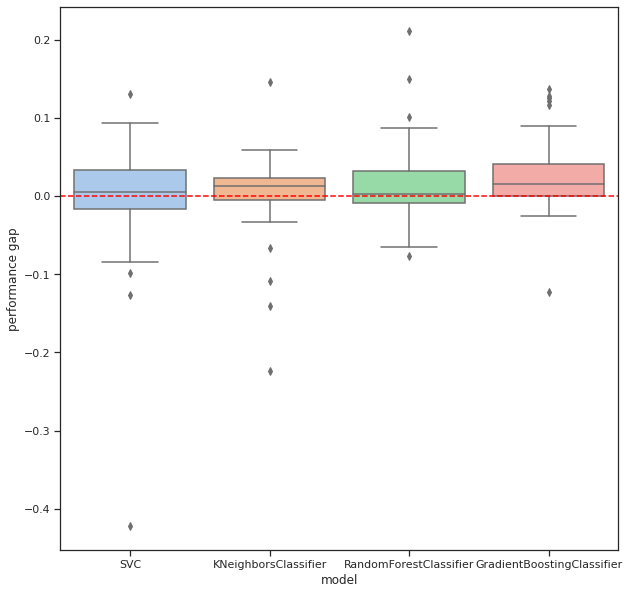

In [59]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=summary, x="model", y='performance gap')
plt.axhline(0, ls='--', c='red')
plt.show()

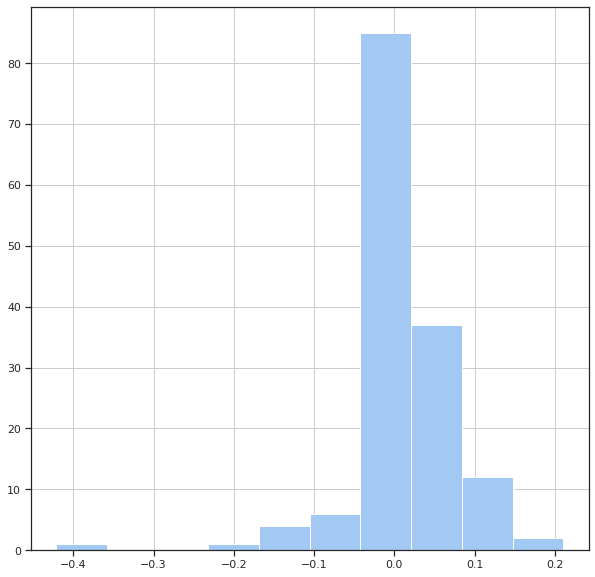

In [70]:
summary['performance gap'].hist(bins=10);

In [76]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['performance gap'].astype(float).describe(), '\n')

SVC
count    37.000000
mean     -0.004602
std       0.086571
min      -0.421464
25%      -0.016814
50%       0.004691
75%       0.033671
max       0.129930
Name: performance gap, dtype: float64 

KNeighborsClassifier
count    37.000000
mean      0.000678
std       0.059816
min      -0.224357
25%      -0.004708
50%       0.013004
75%       0.023379
max       0.145876
Name: performance gap, dtype: float64 

RandomForestClassifier
count    37.000000
mean      0.018156
std       0.053750
min      -0.076730
25%      -0.008714
50%       0.002383
75%       0.032000
max       0.210442
Name: performance gap, dtype: float64 

GradientBoostingClassifier
count    37.000000
mean      0.029448
std       0.050982
min      -0.122834
25%       0.000000
50%       0.015398
75%       0.041198
max       0.136596
Name: performance gap, dtype: float64 



In [81]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['sample'].astype(float).describe(), '\n')

SVC
count    37.000000
mean      0.516757
std       0.342945
min       0.000000
25%       0.110000
50%       0.570000
75%       0.800000
max       0.990000
Name: sample, dtype: float64 

KNeighborsClassifier
count    37.000000
mean      0.485135
std       0.319154
min       0.000000
25%       0.110000
50%       0.490000
75%       0.780000
max       0.990000
Name: sample, dtype: float64 

RandomForestClassifier
count    37.000000
mean      0.510811
std       0.353580
min       0.000000
25%       0.120000
50%       0.570000
75%       0.810000
max       0.990000
Name: sample, dtype: float64 

GradientBoostingClassifier
count    37.000000
mean      0.541622
std       0.354648
min       0.000000
25%       0.110000
50%       0.660000
75%       0.820000
max       0.990000
Name: sample, dtype: float64 



In [82]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['threshold'].astype(float).describe(), '\n')

SVC
count    37.000000
mean      0.659459
std       0.232390
min       0.100000
25%       0.450000
50%       0.800000
75%       0.800000
max       0.950000
Name: threshold, dtype: float64 

KNeighborsClassifier
count    37.000000
mean      0.562162
std       0.238457
min       0.250000
25%       0.300000
50%       0.550000
75%       0.800000
max       0.950000
Name: threshold, dtype: float64 

RandomForestClassifier
count    37.000000
mean      0.690541
std       0.274327
min       0.150000
25%       0.500000
50%       0.800000
75%       0.900000
max       0.950000
Name: threshold, dtype: float64 

GradientBoostingClassifier
count    37.000000
mean      0.674324
std       0.199521
min       0.100000
25%       0.500000
50%       0.750000
75%       0.850000
max       0.950000
Name: threshold, dtype: float64 



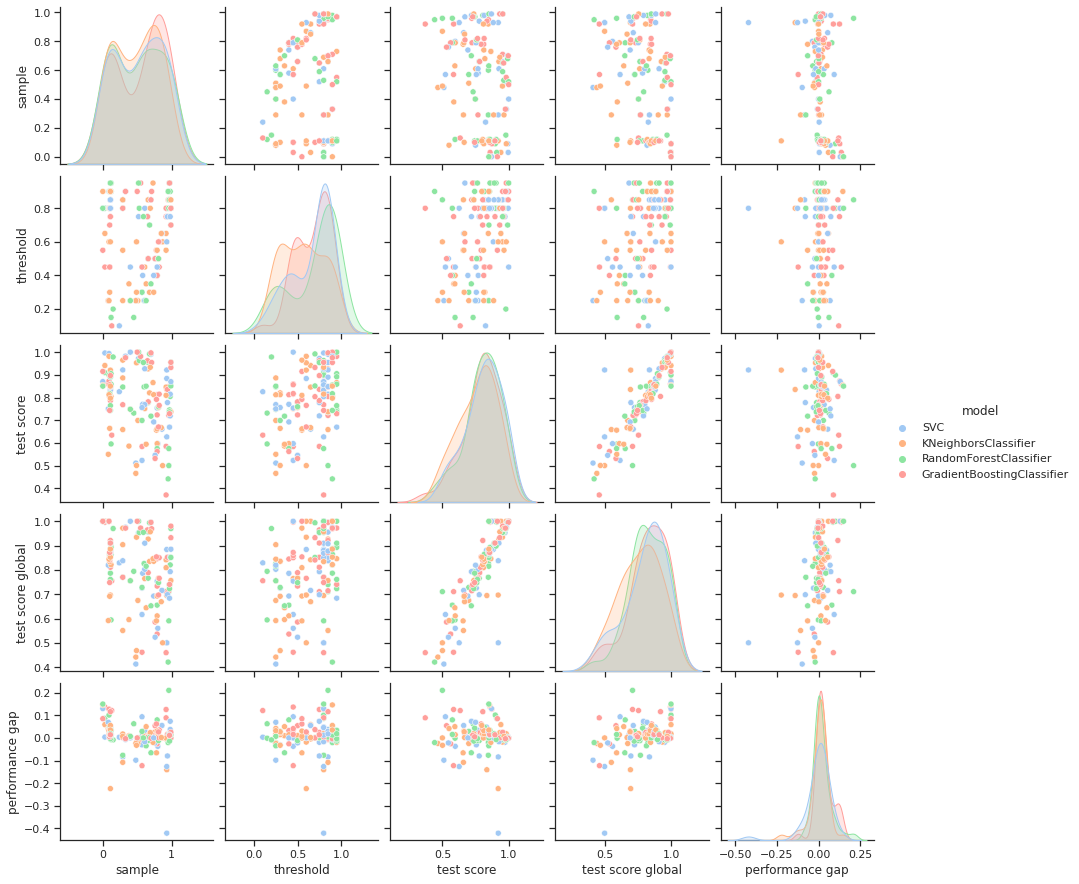

In [80]:
sns.pairplot(summary, hue="model");

In [78]:
import scipy.stats as st

In [79]:
st.spearmanr(summary['test score'], summary['test score global'])[0]

0.9059159290762896